In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import seaborn as sns


def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(total=response["result"]["total"], desc=response["result"]["resource_id"])
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_3c55210de27fcccda2ed0c63fdd2b352")
df.head()

d_3c55210de27fcccda2ed0c63fdd2b352: 100%|██████████| 1262/1262 [00:05<00:00, 248.75it/s]


,_id,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,4,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,5,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [8]:
df["employment_rate_overall"] = df["employment_rate_overall"].str.replace("na", "0") # HACK: replace "na" values with 0 for now
df["employment_rate_overall"] = df["employment_rate_overall"].astype(float)

<Axes: title={'center': 'Average employment rate 2013-2022'}, xlabel='university'>

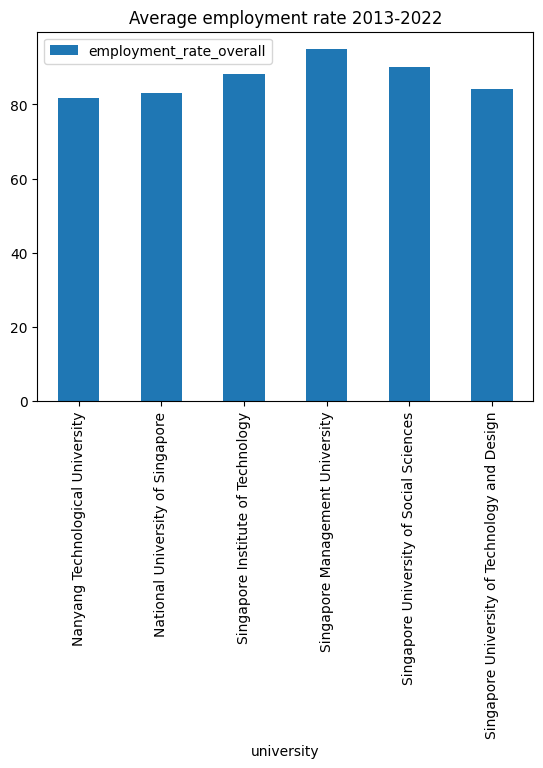

In [15]:
df_plot = df.groupby(["university"])[["employment_rate_overall"]].mean()
df_plot.plot(kind="bar", title="Average employment rate 2013-2022")